<center><img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/></center>
<h1> Hackwagon Academy DS102 Lesson 2B </h1>
<h2> Univariate & Categorical Analysis </h2> 
<h3> Lesson Outline </h3>

- 1. [Univariate Analysis](#1)
    - 1.1 [Interquartile Range (IQR)](#1.1)
    - 1.2 [Outlier Detection](#1.2)
    - 1.3 [Seattle Wages](#1.3)
        - [Practice I](#P1)
- 2. [Categorical Analysis](#2)
    - 2.1 [GroupBy](#2.1)
    - 2.2 [Data Aggregation](#2.2)
    - 2.3 [Advanced Aggregation](#2.3)
    - 2.4 [Pokemon Dataset](#2.4)
        - [Practice II](#P2)

<div class="alert alert-block alert-info">
<b>Datasets:</b>

1. hackwagon-102pandassandbox.csv   
2. seattle-wages-2k.csv
3. pokemon.csv
</div>

### Import Libraries

In [3]:
import re
import pandas as pd
import numpy as np

#For plotting
import matplotlib.pyplot as plt
import matplotlib

<a id='1'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;1.</font><font color="salmon"> Univariate Analysis</font> </h2></a>

In Univariate Analysis, we want to understand a single variable dataset. The common measures include:

1. Mean (Average)
2. Median 
3. Mode 
4. Max & Min 
5. Spread 

One of the most useful measure is understanding the spread of a variable. To measure spread we need to understand the following: 
- Variance & Standard Deviation (learnt last lesson)
- Interquartile Range 

Once we understand the spread of our dataset, we can also detect <b>outliers</b> within the dataset. We're now going to understand how to understand the spread and distribution of the dataset, then detect the outliers of our dataset.

<a id='1.1'><h3>1.1 Interquartile Range (IQR)</h3></a>

A good statistic for summarizing a non-Gaussian (normal) distribution sample of data is the Interquartile Range, IQR. The values are arranged from the lowest to the highest, 
- the **first quartile** is the value where 25% of values are below the value. It is also called the 25th percentile
- the **second quartile** is the value where 50% of values are below the value. It is also called the 50th percentile or the median
- the **third quartile** is the value where 75% of values are below the value. It is also called the 75th percentile

<img src="https://i.imgur.com/27S1Rkh.png" width="400">
<img src="https://i.imgur.com/urMTl4I.png" width="400">
<img src="https://i.imgur.com/9SIeV9P.png" width="400">

<a id='1.2'><h3>1.2 Outlier Detection</h3></a>

An outlier is an observation that is unlike the other observations. It is rare, or distinct, or does not fit in some way. Outliers can have many causes, such as:

- Measurement or input error
- Data corruption
- True outlier observation (e.g. Michael Jordan in basketball)

<img src="https://i.imgur.com/qB3Mynv.png" width="500">

<a id='1.3'><h3>1.3 Seattle Wages</h3></a>

Prepare the Seattle Wages dataset and let's investigate the possible outliers of this dataset based on `Hourly Rate`. 

### Load and preview dataset

Open the `seattle-wages-2k.csv` and open it with pandas and store into a variable called `wages_df`. Preview the dataset with `.head()`.

In [3]:
wages_df = pd.read_csv('seattle-wages-2k.csv')
wages_df.head()

,Department,Job_Title,Hourly_Rate
0,Seattle Public Utilities,"Civil Engrng Spec,Assoc",38.67
1,Seattle Dept of Transportation,Bridge Elecl Maint Supv,46.15
2,City Light,Plng&Dev Spec II,40.93
3,Seattle Center,Stage Tech *,30.42
4,Mayor's Office,Executive2,67.50


### Calculate the Quartiles

Using `.quantile()` get Q1 and Q3 and store them in variables `quartile_1` and `quartile_3`. Inside this function set the `q=` parameter to the % of the quartile.

**Expected Output:**
```python
    29.09 # quartile_1
    47.9775 # quartile_3
```

In [11]:
# Calculate the quantiles
quartile_1 = wages_df['Hourly_Rate'].quantile(q=0.25)
quartile_3= wages_df['Hourly_Rate'].quantile(q=0.75)

47.9775

<a id='P1'><h2> <img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Practice I </font><font color="skyblue"> * </font></h2></a>

### Calculate the IQR 

Using the above variables, calculate the IQR and store it in the variable `IQR`.

**Expected Output:**

    18.8875

In [12]:
# Calculate IQR
IQR = quartile_3 - quartile_1

IQR

18.8875

### Calculate Bounds

Using the variables above, calculate the upper and lower bounds and store them into the variables `lower_bound` and `upper_bound`.

**Expected Output:**
```python
    0.7587500000000027 # lower bound
    76.30875 # upper bound
```

In [17]:
# Calculate Upper and Lower Bounds
lower_bound = quartile_1 - 1.5*IQR

upper_bound = quartile_3 + 1.5*IQR


### Filter Data for Rows Within Bound

Using what you have learnt about filtering, retrieve the data which are deemed as outliers. You should use the variables you've created above. Store this data as variable `outliers_df`.

**Expected Output:**
```python
    print(len(outliers_df)) # 24
```

In [20]:
# Get those outside the bounds
cond1 = wages_df['Hourly_Rate'] > upper_bound 
cond2 = wages_df['Hourly_Rate'] < lower_bound
outliers_df = wages_df[cond1 | cond2]
print(len(outliers_df))

24


### Visualise (End of Practice)

When you've completed the above practice, you can cross check your answers with the visualisation below. 

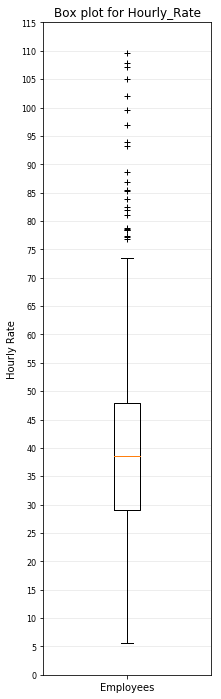

In [18]:
# Visualise to confirm
fig = plt.figure(figsize=(3, 12))
# fig = plt.figure(figsize=(3, 100)) # Use this to examine the outliers in greater detail
ax1 = plt.subplot(111)
# Plot the boxplot and add the relevant features of the plot
ax1.boxplot(wages_df['Hourly_Rate'], sym='+', whis=1.5)
ax1.set_ylabel('Hourly Rate')
ax1.set_title('Box plot for Hourly_Rate')
plt.xticks([1], ['Employees'])
# Set the yticks of the dataset
ax1.set_yticks(np.arange(0, 120, 5))
ax1.set_yticklabels(labels=np.arange(0, 120, 5), fontsize=8)
# Use grid to show the gridlines in the plot
ax1.yaxis.grid(True, linestyle='-', color='lightgrey', alpha=0.5)
plt.show()

### Use `.to_csv()` to save the outliers

Save the new df as a new csv file with the `.to_csv()` with `outliers.csv` as the name in the ().

In [22]:
outliers_df.to_csv('outliers.csv')

<a id='2'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;2.</font><font color="salmon"> Categorical Analysis</font> </h2></a>

In [23]:
feedback_df = pd.read_csv('hackwagon-102pandassandbox.csv')
feedback_df.head()

,ClassID,ClassType,Co-Instructor,Coordinating_TA,Instructor,Rating,Students
0,1,DS101,False,Dick,Jon,Nil,40
1,2,DS101,True,Vera,Andre,7,43
2,3,DS102,False,Vera,Jon,9,41
3,4,DS102,True,Dick,Andre,Nope,44
4,5,DS101,True,Dick,Andre,10,45


<a id='2.1'><h3>2.1 Groupby</h3></a>

Groupby is one of the most useful methods when trying to categorize data within variable. As the name suggest, you are trying to <b>Group</b> the data <b>by</b> something.

<img src="https://i.imgur.com/cfgImho.png" width="500">
<img src="https://i.imgur.com/KrbyyNy.png" width="500">

#### It is important to know that Groupby objects can't be seen, so don't be alarmed if you don't see it

In [25]:
classtype_gb = feedback_df.groupby('ClassType')
classtype_gb

<a id='2.2'><h3>2.2 Simple Aggregation</h3></a>

With a Groupby object, you can apply many aggregation methods, applied to <b>numeric</b> columns, such as:

1. `.sum()` - sums up based on category
2. `.mean()` - gets average based on category
3. `.min()` - gets minimum based on category
4. `.max()` - gets maximum based on category
5. `.size()` - gets count based on category

and many more..

<img src="https://i.imgur.com/8QKUYiL.png" width="500">

In [26]:
classtype_gb.sum()

,ClassID,Co-Instructor,Students
ClassType,,,
DS101,8,2.0,128
DS102,7,1.0,85


<a id='2.3'><h3>2.3 Advanced Aggregation</h3></a>

You can also have multiple aggregation methods put together within a Groupby object by using the `.agg()` where the function accepts a <b>Dictionary</b>, where the key is column name and the value is a <b>list</b> of methods mentioned above. 

<img src="https://i.imgur.com/erWO1yw.png" width="500">

In [27]:
agg_dictionary = {
    "Students": ["max","min","sum"]
}
classtype_gb.agg(agg_dictionary)

Students         
               max min  sum
ClassType                  
DS101           45  40  128
DS102           44  41   85

<a id='2.4'><h3>2.4 Pokemon Dataset</h3></a>

### Load and preview dataset

Open the `pokemon.csv` and open it with pandas as `pokemon_df`. Preview the dataset with `.head()`.

In [4]:
pokemon_df = pd.read_csv('pokemon.csv')

pokemon_df.head()

,Pokemon_ID,Name,Type,HP,Attack,Defense,Speed,Legendary
0,1,Bulbasaur,Grass,45,49,49,45,False
1,2,Ivysaur,Grass,60,62,63,60,False
2,3,Venusaur,Grass,80,82,83,80,False
3,3,VenusaurMega Venusaur,Grass,80,100,123,80,False
4,4,Charmander,Fire,39,52,43,65,False


<a id='P2'><h2> <img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Practice II </font><font color="skyblue"> * </font></h2></a>

### Filter by `Type`

Filter the dataset to just `Grass`, `Fire` and `Water`. Store this in a new df called `grass_fire_water_df`.

_Hint: use .isin()_

In [79]:
filter_cond = pokemon_df['Type'].isin({'Grass','Fire','Water'})

grass_fire_water_df = pokemon_df[filter_cond]

grass_fire_water_df.head()


,Pokemon_ID,Name,Type,HP,Attack,Defense,Speed,Legendary
0,1,Bulbasaur,Grass,45,49,49,45,False
1,2,Ivysaur,Grass,60,62,63,60,False
2,3,Venusaur,Grass,80,82,83,80,False
3,3,VenusaurMega Venusaur,Grass,80,100,123,80,False
4,4,Charmander,Fire,39,52,43,65,False


### Group by `Type`

From the filtered DataFrame above, create a GroupBy object called `grass_fire_water_gb`.

In [80]:
grass_fire_water_gb = grass_fire_water_df.groupby('Type')

### Get Number of Pokemons For Each `Type`

From the above Groupby object, use `.size()` get the number of pokemon of each type.

**Expected Output:**

    Type
    Fire      52
    Grass     70
    Water    112
    dtype: int64

In [41]:
grass_fire_water_gb.size()

Type
Fire      52
Grass     70
Water    112
dtype: int64

### Find Max HP Legendary and Non Legendary Pokemon

1. Isolate the `HP` and `Legendary` columns in a DataFrame from `pokemon_df`
2. Group by `Legendary`
3. Apply `.max()` on the Groupby object.

**Expected Output:**
    
<img src="https://i.imgur.com/zLftmod.png" width="100" align="left">

In [6]:
pokemon_iso = pokemon_df.loc[:,{'HP','Legendary'}]
pokemon_gb =pokemon_iso.groupby('Legendary')

pokemon_gb.max()

,HP
Legendary,
False,255
True,150


**Credits**
- [City of Seattle Wage Data](https://data.seattle.gov/City-Business/City-of-Seattle-Wage-Data/2khk-5ukd) for the dataset
- [Pokemon with stats, Kaggle](https://www.kaggle.com/abcsds/pokemon) for the dataset

1.5682243758418617


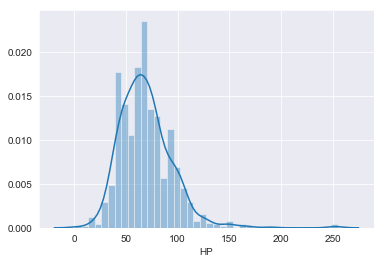

In [71]:
import seaborn as sns

print(pokemon_df['HP'].skew())
sns.set_style('darkgrid')
sns.distplot(pokemon_df['HP'])